In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv(
    "TroubleshootDataRemoval.txt",
    comment="#",           # ignore metadata/header lines
    sep=r"\s+",            # split on whitespace
    header=None,           # no real header row in the data
    names=["id","x","y","area","pressure","Z"] 
)

print(df.tail())


    id     x     y  area  pressure  Z
7    2  50.0  50.0     1         1  1
8    3   4.0   1.3     1         1  1
9    1   2.5   1.6     1         1  1
10   2   3.0   1.5     1         1  1
11   3   4.5   1.4     1         1  1


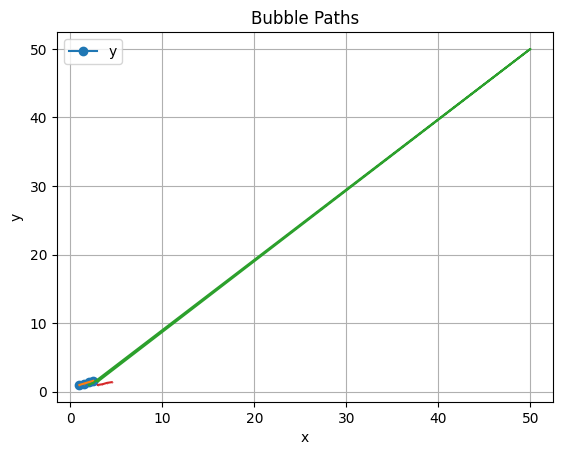

In [4]:
# Path of bubble 1 for reference
df[df["id"] == 1].plot(x="x", y="y", kind="line", marker="o")

# All bubble paths
for bubble_id, group in df.groupby("id"):
    plt.plot(group["x"], group["y"], marker="o", markersize=.2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Bubble Paths")
plt.show()

In [ ]:
# Identify big jumps

for bubble_id, g in df.groupby("id"):
    diffs = g[["x","y"]].diff().abs()
    if (diffs > 5).any().any():   # threshold depends on your scale
        print(f"Bubble {bubble_id} has a big jump: at {diffs[diffs > 5].stack().index.tolist()}")
        


Bubble 2 has a big jump: at [(7, 'x'), (7, 'y'), (10, 'x'), (10, 'y')]


   id    x    y  area  pressure  Z
0   1  1.0  1.0     1         1  1
3   1  1.5  1.2     1         1  1
6   1  2.0  1.4     1         1  1
9   1  2.5  1.6     1         1  1
   id    x    y  area  pressure  Z
1   2  2.0  1.0     1         1  1
4   2  2.5  1.3     1         1  1
    id    x    y  area  pressure  Z
2    3  3.0  1.0     1         1  1
5    3  3.5  1.1     1         1  1
8    3  4.0  1.3     1         1  1
11   3  4.5  1.4     1         1  1


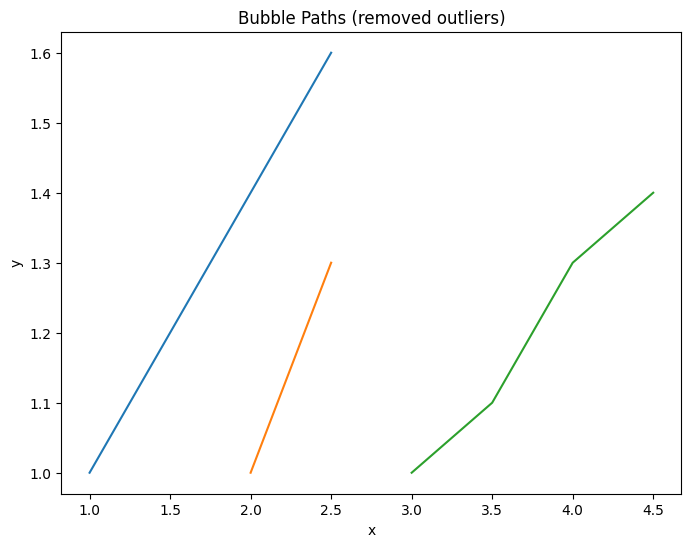

In [ ]:
thresh = 5.0   # threshold
plt.figure(figsize=(8,6))

for bubble_id, g in df.groupby("id"):
    g = g.sort_index()

    # compute step-to-step differences
    diffs = g[["x","y"]].diff().abs()
    # mark rows where either x or y jump is too large
    bad_mask = (diffs > thresh).any(axis=1)

    # drop the second point of bad jumps
    clean_g = g.loc[~bad_mask]
    print( clean_g )

    # plot cleaned path
    plt.plot(clean_g["x"], clean_g["y"], markersize=0.2)


plt.xlabel("x")
plt.ylabel("y")
plt.title("Bubble Paths (removed outliers)")
plt.show()

"""so the code registers both the jump over and the jump back as bad data, and removes both"""